# Load Data

In [1]:
import pandas as pd
import sys
import random
import numpy as np

In [2]:
import re
from utils.text_preprocessing import tokenize, stopwords, clean_text, preprocess
from parsers.russian_parser import Russian

[nltk_data] Downloading package punkt to /home/genvekt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/genvekt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/genvekt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
df = pd.read_csv('datasets/cleared_RUS.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,PROTOCOL,ZAKL,CARD_NUMB,FULL_TEXT,CLEARED
0,0,0,Легочной рисунок сгущен с обеих сторон в базал...,Для исключения подтверждения плеврита и опреде...,19/015013,Легочной рисунок сгущен с обеих сторон в базал...,Легочной рисунок сгущен с обеих сторон в базал...
1,1,1,Слева в проекции 1-го межреберья тень округлой...,Ro-ки картина периф тумора в доли левого лёгко...,11/001161,Слева в проекции 1-го межреберья тень округлой...,Слева в проекции 1-го межреберья тень округлой...
2,2,2,Легочной рисунок без очаговых и инфильтративны...,Данных за онкопатологию в легочной ткани не вы...,19/080831,Легочной рисунок без очаговых и инфильтративны...,Легочной рисунок без очаговых и инфильтративны...
3,3,3,На Ро грам и То грам ОГК Легочной рисунок усил...,Периф тумор нижней доли левого легкого По срав...,20/000962,На Ро грам и То грам ОГК Легочной рисунок усил...,На Ро грам и То грам ОГК Легочной рисунок усил...
4,4,4,Легочной рисунок усилен с обеих сторон с участ...,Данных за онкопатологию в легочной ткани не вы...,19/055026,Легочной рисунок усилен с обеих сторон с участ...,Легочной рисунок усилен с обеих сторон с участ...


In [3]:
df = pd.read_csv('datasets/anonimized.csv')
df.PROTOCOL = df.PROTOCOL.str.replace(' +', ' ')
df.ZAKL = df.ZAKL.str.replace(' +', ' ')
df.PROTOCOL = df.PROTOCOL.str.replace('[^\w\s-]', ' ')
df.ZAKL = df.ZAKL.str.replace('[^\w\s-]', ' ')

In [4]:
df["FULL_TEXT"] = df.PROTOCOL.fillna('') +" "+ df.ZAKL.fillna('')
df.drop(df[df["FULL_TEXT"] == " " ].index , inplace=True)

In [5]:
df.FULL_TEXT.shape

(8353,)

In [6]:
df.FULL_TEXT[df.FULL_TEXT == ' ']

Series([], Name: FULL_TEXT, dtype: object)

In [7]:
df.shape

(8353, 5)

In [4]:
rus_data = Russian()
rus_data.parse_data()
len(rus_data.dataset)
rus_data = clean_text(rus_data)

No diagnosis in  74319
No diagnosis in  74308


In [ ]:
from utils.text_statistics import DatasetStat
from parsers.report import Report
text = df.ZAKL.dropna().to_list()
reports = []
for t in text:
    if not t is None:
        reports.append(Report(t, "a"))
stat = DatasetStat()
stat.calculate_statistics(reports)                   

In [14]:
stat.mean_doc_length

12.350478893224548

# Process words

In [5]:
import wget
from utils.rus_preprocessing_udpipe import *
#udpipe_url = 'https://rusvectores.org/static/models/udpipe_syntagrus.model'
#modelfile = wget.download(udpipe_url)
modelfile = 'udpipe_syntagrus.model'

def log_progress(sequence, every=10):
    from ipywidgets import IntProgress
    from IPython.display import display

    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)
    
    for index, record in enumerate(sequence):
        if index % every == 0:
            progress.value = index
        yield record

In [5]:
text = df.CLEARED.to_list()
len(text)

8353

In [76]:
text = []
for report in rus_data.dataset:
    if report.label != 'норма':
        text.append(report.text)
len(text)

2338

In [77]:
preprocessed_text = tag_ud(text=log_progress(text), modelfile=modelfile)



Loading the model...
Processing input...


IntProgress(value=0, max=2338)

In [9]:
len(preprocessed_text)

4682

# Work with model

In [10]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

unable to import 'smart_open.gcs', disabling that module


In [94]:
#model = gensim.models.KeyedVectors.load_word2vec_format('models/ruwikiruscorpora_upos_skipgram_300_2_2019/model.bin', binary=True)
#model = gensim.models.KeyedVectors.load_word2vec_format('models/araneum_upos_skipgram_300_2_2018.vec')
#model = gensim.models.KeyedVectors.load("models/ruscorpora_none_fasttextskipgram_300_2_2019/model.model")
model = gensim.models.KeyedVectors.load("models/araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model")

2020-05-06 13:45:10,649 : INFO : loading Word2VecKeyedVectors object from models/araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model
2020-05-06 13:45:11,648 : INFO : loading vectors from models/araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model.vectors.npy with mmap=None
2020-05-06 13:45:15,321 : INFO : loading vectors_ngrams from models/araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model.vectors_ngrams.npy with mmap=None
2020-05-06 13:48:17,370 : INFO : loading vectors_vocab from models/araneum_none_fasttextcbow_300_5_2018/araneum_none_fasttextcbow_300_5_2018.model.vectors_vocab.npy with mmap=None
2020-05-06 13:49:22,550 : INFO : setting ignored attribute vectors_vocab_norm to None
2020-05-06 13:49:34,102 : INFO : setting ignored attribute vectors_ngrams_norm to None
2020-05-06 13:49:34,171 : INFO : setting ignored attribute vectors_norm to None
2020-05-06 13:49:34,309 : INFO : setting ignored attribu

In [53]:
model.get_vector(preprocessed_text[1][2])

array([ 2.56762747e-03, -3.06769414e-03, -8.63276795e-03, -1.57828722e-02,
       -5.10377111e-03, -1.00865522e-02,  5.67407953e-03, -2.96779349e-03,
       -5.20391203e-03,  1.84100568e-02,  1.82917633e-03,  9.84789617e-03,
        2.09024246e-03, -9.33323827e-05, -1.01381750e-03,  7.43926316e-03,
       -8.55027698e-03, -3.70887923e-03,  1.16718151e-02, -4.93471336e-04,
        9.16917529e-03,  5.31511940e-03,  8.80279578e-03,  1.82215776e-02,
        3.64181772e-03, -1.29931057e-02, -1.41564114e-02, -1.60508347e-03,
        1.11563988e-02, -6.91024773e-03, -1.62706757e-03, -5.37051074e-03,
        1.43521558e-02, -1.14570907e-03, -4.32393281e-03,  5.56153757e-03,
       -6.06747903e-03,  5.70207369e-04, -6.79532252e-03,  4.68147919e-03,
       -6.30600844e-03, -1.12960965e-03,  9.71243531e-03, -3.30430269e-03,
        6.99146511e-03, -9.71637573e-03, -1.20209390e-03, -5.04549732e-03,
        1.89530291e-02,  5.51571604e-03, -1.71468928e-02,  2.58447137e-03,
       -4.44736890e-03, -

# Clasterization of the document

In [12]:
def cos_sim(v1, v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [13]:
def crp(words, model):
    clusterVec = [] # sum of vectors in cluster
    clusterIdx = [] # array of index arrays. e.g. [[1, 3, 5], [2, 4, 6]]
    ncluster = 0
    
    pnew = 1.0/ (1 + ncluster)  
    N = len(words)
    rands = np.random.uniform(0,1,N) # N rand variables sampled from U(0, 1)
    for i in range(N):
        word = words[i]
        if not word in model:
            continue
            
        maxSim = -1000000
        maxIdx = 0
        
        # Convert word to vector
        vec = model.get_vector(word)
        
        # Go through all clusters and find the most similar one
        for j in range(ncluster):
            # Compare word with cluster j center
            sim = cos_sim(vec, clusterVec[j])
            if sim > maxSim:
                maxIdx = j
                maxSim = sim
                
        # If there is no clusters, create one
        if len(clusterVec) == 0:
            clusterVec.append([])
            clusterIdx.append([])
            clusterVec[ncluster] = vec
            clusterIdx[ncluster] = [i]
            ncluster += 1
            pnew = 1.0 / (1 + ncluster)
            continue
            
        # If there is chance to create new cluster
        if maxSim < pnew:
            # If to create new cluster:
            if rands[i] < pnew:
                # Create new cluster
                clusterVec.append([])
                clusterIdx.append([])
                clusterVec[ncluster] = vec
                clusterIdx[ncluster] = [i]
                ncluster += 1
                pnew = 1.0 / (1 + ncluster)
            # Else Go to cluster C
            else:
                # Put word to the most similar cluster
                clusterVec[maxIdx] = clusterVec[maxIdx] + vec
                clusterIdx[maxIdx].append(i)
        # Else Go to cluster C
        else:
            # Put word to the most similar cluster
            clusterVec[maxIdx] = clusterVec[maxIdx] + vec
            clusterIdx[maxIdx].append(i)
 
    return clusterIdx

In [12]:
doc_id = 15
clusters = crp(preprocessed_text[doc_id], model)
for i in range(len(clusters)):
    print()
    print(i)
    for w_id in clusters[i]:
        print(preprocessed_text[doc_id][w_id])


0
легкий_ADJ
оба_NUM
сторона_NOUN
размер_NOUN
динамика_NOUN
xx_NUM
увеличиваться_VERB
синус_NOUN
свободный_ADJ
справа_NOUN
si_NUM
расширить_VERB
вероятно_ADV
увеличение_NOUN
лето_NOUN
аорта_NOUN
предел_NOUN
явный_ADJ
расширение_NOUN
двусторонний_ADJ
процесс_NOUN
легкий_ADJ
центр_NOUN
правый_ADJ
легкий_ADJ
отрицательный_ADJ
xx_NUM
сть_NOUN

1
количество_NOUN
доля_NOUN
преимущественно_ADV
счет_VERB

2
очаг_NOUN
корень_PROPN

3
сердце_PROPN

4
tr_X


# Define words weights

In [14]:
import math
def tf_idf(documents):
    N = len(documents)
    docfrec = {}
    weights = []
    for doc in documents:
        tfs =  {}
        # Calculate term frequency for each word in document
        for word in doc:
            if not word in tfs:
                tfs[word] = 0
            tfs[word] += 1
        
        # Update document frequency for all unique words in doc 
        for word in tfs.keys():
            if not word in docfrec:
                docfrec[word] = 0
            docfrec[word] += 1
            
        weights.append(tfs)
        
    for i in range(N):
        # Calculate tf-idf for each word in document
        tfidf = {}
        for word, tf in weights[i].items():
            tfidf[word] = tf/len(documents[i])*math.log2(N/docfrec[word])
        weights[i] = tfidf
        
    return weights

weights = tf_idf(preprocessed_text)

In [14]:
weights

[{'легочный_ADJ': 0.0038924882191965025,
  'рисунок_NOUN': 0.0056190696092989646,
  'сгущать_VERB': 0.16281234865489191,
  'с_ADP': 0.024551532090270826,
  'оба_NUM': 0.03415439328604934,
  'сторона_NOUN': 0.1035287213888856,
  'в_ADP': 0.0027201189185758643,
  'базальный_ADJ': 0.07834936112828673,
  'отдел_NOUN': 0.05995399891933869,
  'возможный_ADJ': 0.13841515039146357,
  'за_ADP': 0.012150731610770975,
  'счет_NOUN': 0.0432659580522672,
  'приподнять_ADJ': 0.22462204694318771,
  'купол_NOUN': 0.11083784591337414,
  'диафрагма_NOUN': 0.09757357521560432,
  'правый_ADJ': 0.05460330718464644,
  'и_CCONJ': 0.014564404320482862,
  'левый_ADJ': 0.06177696339373214,
  'приподнимать_VERB': 0.22462204694318771,
  'корень_PROPN': 0.004324541508844212,
  'структурный_ADJ': 0.004861798948265949,
  'передний_ADJ': 0.05695801499284375,
  'синус_NOUN': 0.009258228030833638,
  'облитерировать_VERB': 0.06231811713242612,
  'снижать_VERB': 0.10170337423724,
  'пневматизация_NOUN': 0.121565496538016

# Define weighted vectors of the documents

In [15]:
def doc_2_vec(document, clustering, words_weights, model):
    clusterIdx = clustering(document, model)
    clusters_mean_weight = []
    clusters_vec = []
    
    # Calculate mean weight for each cluster
    for cluster in clusterIdx:
        mean_weight = 0
        cluster_vec = None
        for w_id in cluster:
            word = document[w_id]
            vec = model.get_vector(word)
            if cluster_vec is None:
                cluster_vec = vec
            else:
                cluster_vec = vec + cluster_vec
            mean_weight += words_weights[word]
        mean_weight /= len(cluster)
        clusters_mean_weight.append(mean_weight)
        clusters_vec.append(cluster_vec)
        
    # Normalize weights
    total_weight = sum(clusters_mean_weight)
    clusters_mean_weight = [weight/total_weight for weight in clusters_mean_weight]
    
    # Calculate the vector for the document
    # That is weighted sum of clusters vectors
    doc_vector = None
    for i in range(len(clusterIdx)):
        if doc_vector is None:
            doc_vector = clusters_mean_weight[i]*clusters_vec[i]
        else:
            doc_vector += clusters_mean_weight[i]*clusters_vec[i]
            
    return doc_vector

In [16]:
def dataset_2_vectors(dataset, clustering,  model):
    N = len(dataset)
    tf_idf_weigths = tf_idf(dataset)
    
    vectors = []
    
    for i in range(N):
        vectors.append(doc_2_vec(dataset[i],clustering, tf_idf_weigths[i], model))
    return vectors

In [95]:
dataset_vectors = dataset_2_vectors(preprocessed_text,crp, model)

In [96]:
vectors = dataset_vectors.copy()
dataset_vectors = [vec for vec in vectors if vec is not None]

# Print the result using t-SNE

In [80]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [97]:
X = np.array(dataset_vectors)
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(2338, 2)

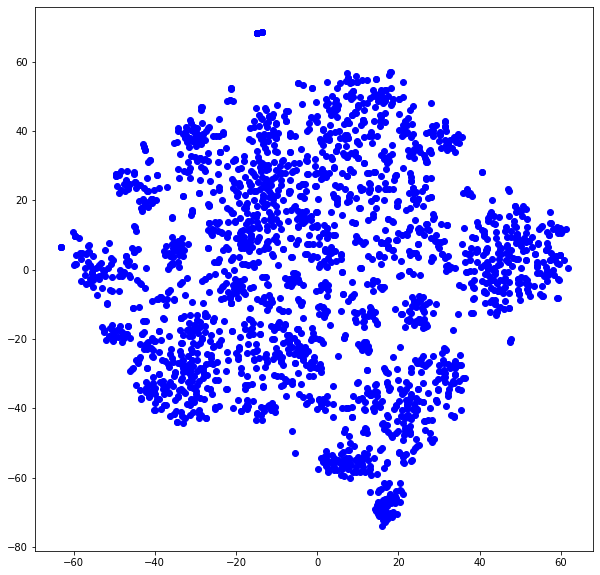

In [98]:
plt.figure(figsize=(10,10))
for i in range(len(X_embedded)):
    point = X_embedded[i]
    '''
    if 'без' in text[i] and 'изменений' in text[i]:
        color = 'green'
    else:
        color = 'blue'
    '''
    color = 'blue'
    plt.plot(point[0],point[1], 'o', color=color)
plt.plot()
plt.savefig('plots/araneum_fasttextcbow.png')

# Sample reports

In [21]:
def get_samples_around(center_point,  w_radius, h_radius):
    for i in range(len(X_embedded)):
        if abs(X_embedded[i][0] - center_point[0]) < w_radius and abs(X_embedded[i][1] - center_point[1])<h_radius:
            print(text[i])
            print()

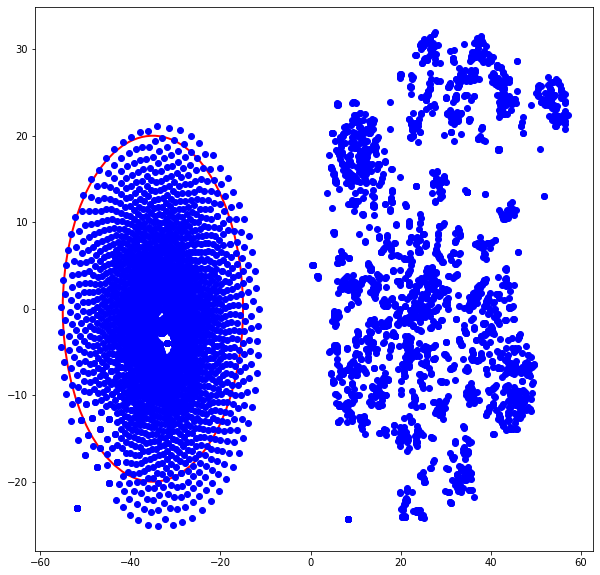

In [22]:
from matplotlib.patches import Ellipse
    
center = (-35, 0)
area_w = 20
area_h = 20

plt.figure(figsize=(10,10))
ax = plt.gca()
for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.plot()
plt.show()

In [23]:
get_samples_around(center, area_w , area_h)

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма

Норма


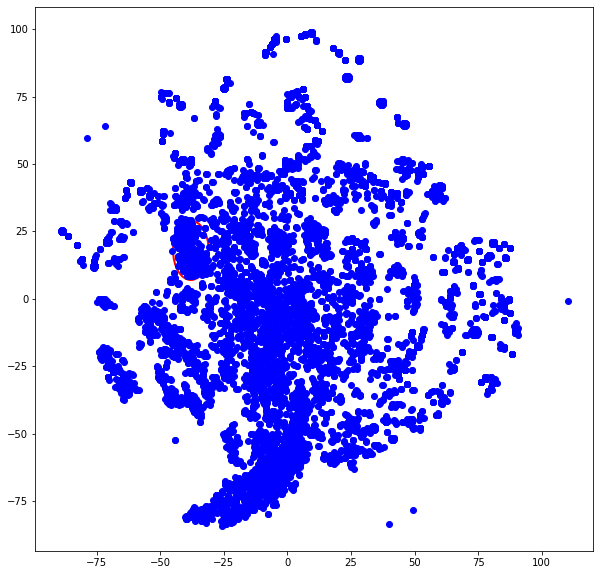

In [68]:
from matplotlib.patches import Ellipse
    
center = (-38, 18)
area_w = 7
area_h = 11

plt.figure(figsize=(10,10))

for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ax = plt.gca()

ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
plt.plot()
ax.add_patch(ellipse)

plt.show()

In [69]:
get_samples_around(center, area_w , area_h)

Лёгкие расправлены синусы свободные Справа - в зоне операции пульмонит пристеночные плевральные наложения Сердце аорта - в пределах N сн - 2 

Справа - лёгкое расправлено в зоне операции пульмонит купол диафрагмы подтянут вверх Слева - поля б о Синусы свободные Сердце расширено в поперечнике аорта -в пределах N сн - 2 

Лёгкие слева - поля б о Справа- лёгкое расправлено в зоне операции пульмонит в базальных отделах плевро-диафрагмальные сращения Сердце аорта - в пределах N сн - 2 

Лёгкие расправлены синусы свободные Сердце аорта - в пределах N сн -2 

Лёгкие слева - поля б о синусы свободные Справа - гомогенный фиброторакс после п эктомии 2019г г Ульяновск Средостение смещено вправо сн - 2 

Лёгкие слева - поля б о синусы свободные Справа - воздушная полость после п эктомии в плевральной полости выпот до переднего отрезка 3 ребра Сердце аорта - в пределах N Средостение не расширено трахея смещена вправо сн - 2 

Лёгкие слева - поля б о синусы свободные Справа - в области верхушки лёгк

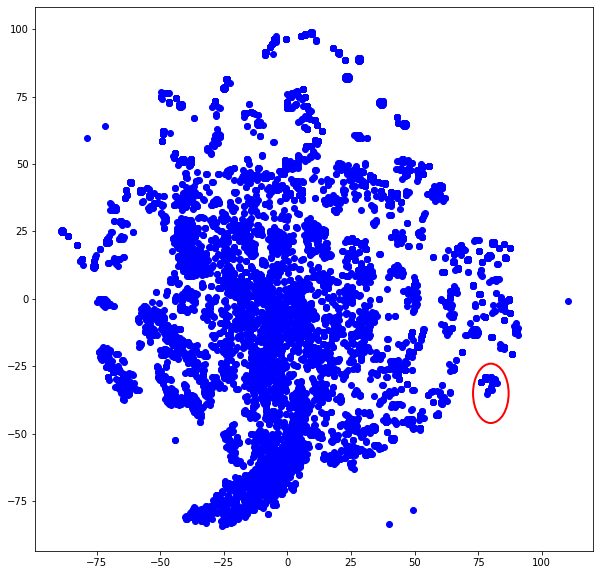

In [70]:
from matplotlib.patches import Ellipse
    
center = (80, -35)
area_w = 7
area_h = 11

plt.figure(figsize=(10,10))

for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ax = plt.gca()

ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
plt.plot()
ax.add_patch(ellipse)

plt.show()

In [71]:
get_samples_around(center, area_w , area_h)

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Костной патологии не определяется  Данных за онкопатологию в легочной ткани не выявлено

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Костной патологии не определяется  Данных за онкопатологию в легочной ткани не выявлено 

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено аорта в пределах нормы Костной патологии не определяется  Данных за онкопатологию в легочной ткани не выявлено

Легочной рисунок без очаговых и инфильтративных изменений Корни структурные Синусы свободные Средостение не расширено Сердце аорта в пределах нормы Костной патологии не определяется  Данных за онкопатологию в легочной ткани не выявлено

Легочной рисунок без очаговых и инфильтративных изменений 

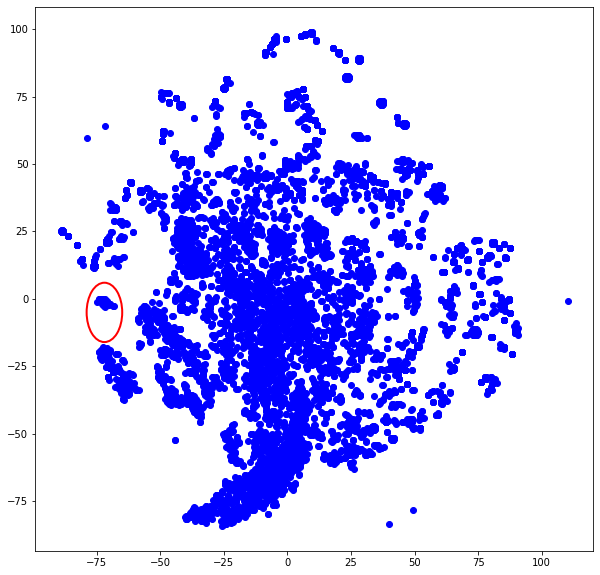

In [73]:
from matplotlib.patches import Ellipse
    
center = (-72, -5)
area_w = 7
area_h = 11

plt.figure(figsize=(10,10))

for point in X_embedded:
    plt.plot(point[0],point[1], 'o', color='blue')
ax = plt.gca()

ellipse = Ellipse(xy=center, width=area_w*2, height=area_h*2, 
                        edgecolor='r', fc='None', lw=2)
plt.plot()
ax.add_patch(ellipse)

plt.show()

In [74]:
get_samples_around(center, area_w , area_h)

После установки порта Время 10ч 05 мин Лёгкие расправлены Дист.альный конец порта находится на уровне п отрезка 3 ребра справа  Снимок 1 в эл архиве Ренекс РЦ 1 и в ист. б-ни

После установки порта Время 10ч 48мин Лёгкие расправлены Дист.альный конец порта находится на уровне п отрезка 3 ребра справа  Снимок 1 в эл архиве Ренекс РЦ 1 и в ист. б-ни

После установки порта Время 10ч 05мин Лёгкие расправлены Дист.альный конец порта находится на уровне 3 межреберья справа  Снимок 1 в эл архиве Ренекс РЦ 1 и в ист. б-ни

После установки порта Время 10ч 07мин Лёгкие расправлены Дист.альный конец порта находится на уровне 2 межреберья справа  Снимок 1 в эл архиве Ренекс РЦ 1 и в ист. б-ни

После установки порта Время 10ч 19мин Лёгкие расправлены В базальных отделах преимущественно слева плевральные наложения Дист.альный конец порта находится на уровне п отрезка 2 ребра справа  Снимок 1 в эл архиве Ренекс РЦ 1 и в ист. б-ни

После установки порта Время 13ч 30мин Лёгкие расправлены Дист.альный к

# Discover which words from vocabulary are not in the model

In [32]:
def get_vocadulary(dataset):
    voc = set()
    for doc in dataset:
        for word in doc:
            voc.add(word)
    return voc

In [47]:
def find_apsent_words(dataset, model):
    absent_words = []
    voc = get_vocadulary(dataset)
    for word in voc:
        if not word in model:
            absent_words.append(word)
    return absent_words

In [45]:
absent = find_apsent_words(preprocessed_text, model)

[]


In [26]:
absent

2479

In [35]:
absent

3029

In [46]:
absent

0

# Locate documents with absent words

In [48]:
model_with_absent_words = gensim.models.KeyedVectors.load_word2vec_format('models/ruwikiruscorpora_upos_skipgram_300_2_2019/model.bin', binary=True)
absent_words = find_apsent_words(preprocessed_text, model_with_absent_words)

2020-04-29 18:02:23,312 : INFO : loading projection weights from models/ruwikiruscorpora_upos_skipgram_300_2_2019/model.bin
2020-04-29 18:02:32,358 : INFO : loaded (248978, 300) matrix from models/ruwikiruscorpora_upos_skipgram_300_2_2019/model.bin


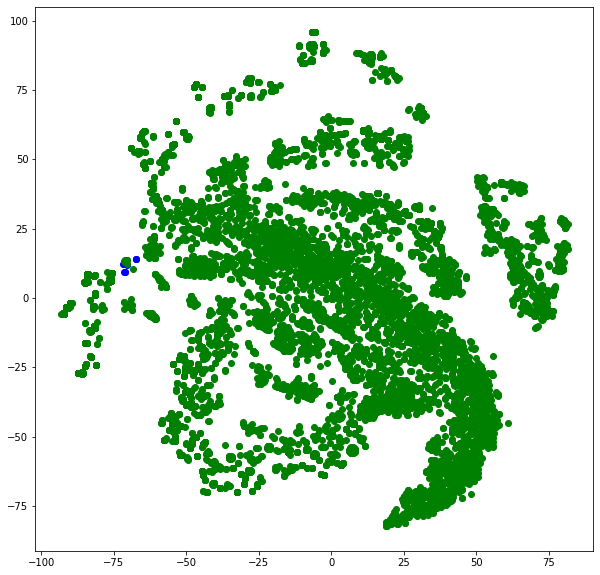

In [50]:
plt.figure(figsize=(10,10))
for i in range(len(X_embedded)):
    point = X_embedded[i]
    color = 'blue'
    for absent_word in absent_words:
        if absent_word in preprocessed_text[i]:
            color = 'green'
    
    
    plt.plot(point[0],point[1], 'o', color=color)
plt.plot()
plt.show()

In [51]:
preprocessed_text[1]

['слева_ADV',
 'в_ADP',
 'проекция_NOUN',
 'первый_ADJ',
 'межреберий_NOUN',
 'тень_NOUN',
 'округлый_ADJ',
 'форма_NOUN',
 'с_ADP',
 'нечётко_ADJ',
 'неровный_ADJ',
 'контур_NOUN',
 'размер_NOUN',
 'x_NUM',
 'x_NUM',
 'сантиметр_NOUN',
 'в_ADP',
 'd_X',
 'корень_PROPN',
 'с_ADP',
 'не_PART',
 'совсем_ADV',
 'четкий_ADJ',
 'структура_NOUN',
 'синус_PROPN',
 'с_ADP',
 'оба_NUM',
 'сторона_NOUN',
 'завуалировывать_VERB',
 'вероятно_ADV',
 'за_ADP',
 'счет_VERB',
 'выпот_NOUN',
 'плевральный_ADJ',
 'наложение_NOUN',
 'трахей_PROPN',
 'главный_ADJ',
 'бронх_NOUN',
 'несколько_ADV',
 'смещать_VERB',
 'вправо_ADV',
 'сердце_PROPN',
 'аорта_NOUN',
 'в_ADP',
 'предел_NOUN',
 'возрастной_ADJ',
 'норма_NOUN',
 'костный_ADJ',
 'патология_NOUN',
 'не_PART',
 'определять_VERB',
 'ro-ка_ADV',
 'картина_NOUN',
 'пер_NOUN',
 'тумор_NOUN',
 'в_ADP',
 'доля_NOUN',
 'левый_ADJ',
 'легкий_ADJ',
 'susp_PROPN',
 'двусторонний_ADJ',
 'плеврить_NOUN',
 'сантин-етр_NOUN',
 'рц_PROPN',
 'x_NUM']